In [1]:
import os
import glob

def remove_files_with_pattern(folder_path, pattern):
    # Create the full pattern for glob
    full_pattern = os.path.join(folder_path, pattern)
    
    # Use glob to find files matching the pattern
    files_to_remove = glob.glob(full_pattern)
    
    # Remove each file
    for file_path in files_to_remove:
        try:
            os.remove(file_path)
            print(f"Removed: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")

# Example usage
folder_path = 'blob'  # Replace with your folder path
pattern = '*'  # Replace with your desired pattern (e.g., '*.jpg', '*.log', etc.)
remove_files_with_pattern(folder_path, pattern)


Removed: blob/imagen_45.png
Removed: blob/imagen_12.png
Removed: blob/imagen_33.png
Removed: blob/imagen_24.png
Removed: blob/imagen_20.png
Removed: blob/imagen_108.png
Removed: blob/imagen_133.png
Removed: blob/imagen_19.png
Removed: blob/imagen_14.png
Removed: blob/imagen_74.png
Removed: blob/imagen_120.png
Removed: blob/imagen_83.png
Removed: blob/imagen_98.png
Removed: blob/imagen_42.png
Removed: blob/imagen_71.png
Removed: blob/imagen_25.png
Removed: blob/imagen_76.png
Removed: blob/imagen_57.png
Removed: blob/imagen_55.png
Removed: blob/imagen_53.png
Removed: blob/imagen_117.png
Removed: blob/imagen_44.png
Removed: blob/imagen_109.png
Removed: blob/imagen_37.png
Removed: blob/imagen_2.png
Removed: blob/imagen_88.png
Removed: blob/imagen_96.png
Removed: blob/imagen_118.png
Removed: blob/imagen_49.png
Removed: blob/imagen_136.png
Removed: blob/imagen_60.png
Removed: blob/imagen_87.png
Removed: blob/imagen_73.png
Removed: blob/imagen_125.png
Removed: blob/imagen_22.png
Removed: blob

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el CSV
df = pd.read_csv('../CPM/output.csv')
df.columns = df.columns.str.strip()
print(df.head())


          t         mx         my        mr        p0x        p0y       p0r  \
0  0.000000  99.850000  35.000000  0.150000  64.067415  55.980565  0.150000   
1  0.016667  99.840170  35.000000  0.167778  64.071937  55.977914  0.160667   
2  0.033333  99.830350  34.999575  0.167778  64.084089  55.970786  0.182000   
3  0.050000  99.803954  34.998404  0.203333  64.106765  55.957483  0.214000   
4  0.066667  99.785630  34.997577  0.185556  64.142668  55.936403  0.256667   

         p1x        p1y       p1r  ...      p11r       p12x       p12y  \
0  33.981807  15.182323  0.150000  ...  0.150000  73.102067  61.052215   
1  33.986826  15.183833  0.160667  ...  0.160667  73.105822  61.048558   
2  34.000317  15.187893  0.182000  ...  0.182000  73.115913  61.038726   
3  34.025492  15.195469  0.214000  ...  0.214000  73.134739  61.020376   
4  34.065359  15.207471  0.256667  ...  0.256667  73.164539  60.991300   

       p12r       p13x       p13y      p13r       p14x       p14y      p14r  
0 

KeyboardInterrupt: 

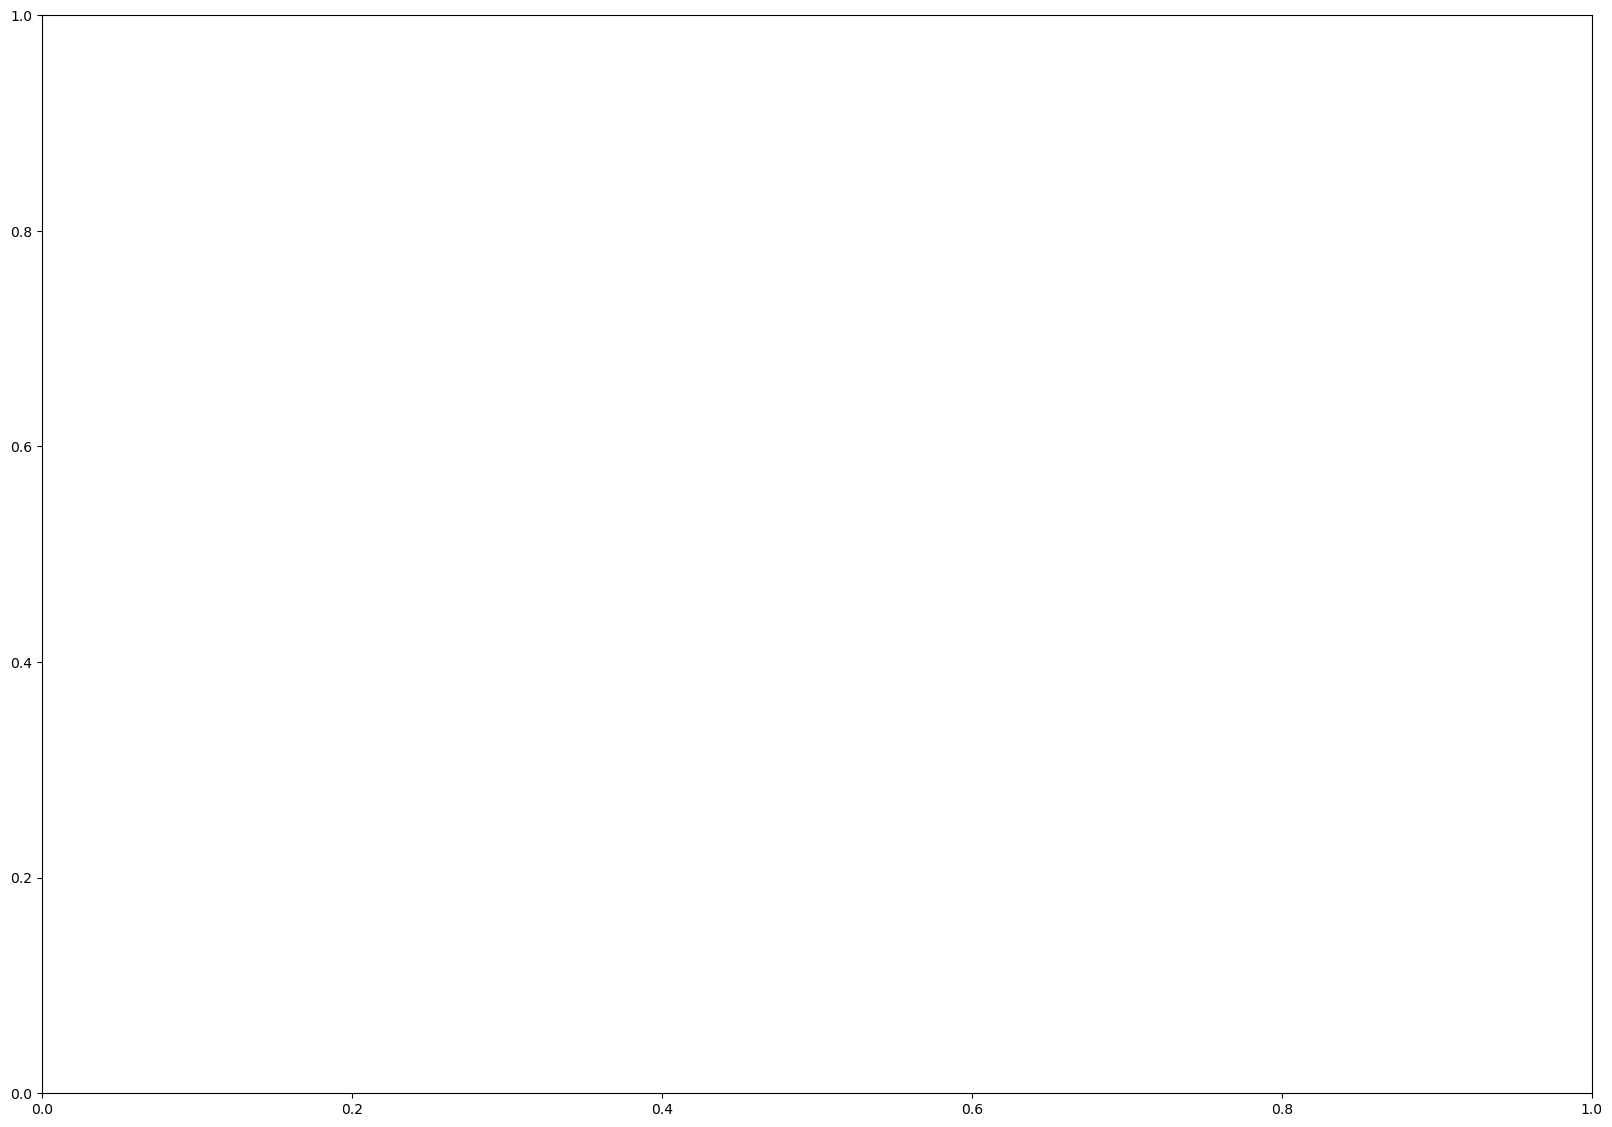

In [3]:
# Recorrer cada fila del DataFrame
import json

# Opening JSON file
f = open('../config.json',)
 
# returns JSON object as 
# a dictionary
data = json.load(f)
min_r = data["minRadius"]
N = data["blueN"]
resize = 2
for index, row in df.iterrows():
    fig, ax = plt.subplots(figsize=(20,14))
    # Dibujar el círculo azul (mx, my, mr)
    circle = plt.Circle((row['mx'], row['my']), min_r * resize, color='blue')
    circle_dashed = plt.Circle((row['mx'], row['my']), row['mr']* resize, color='blue', fill=False, linestyle='--')
    ax.add_patch(circle)
    ax.add_patch(circle_dashed)

    # Dibujar los puntos rojos (p0x, p0y, ..., p14x, p14y) con su radio correspondiente (p0r, p1r, ..., p14r)
    for i in range(N):
        circle = plt.Circle((row[f'p{i}x'], row[f'p{i}y']), min_r* resize, color='red')
        circle_dashed = plt.Circle((row[f'p{i}x'], row[f'p{i}y']), row[f'p{i}r']* resize, color='red', fill=False, linestyle='--')# Radio ajustado con pnr
        ax.add_patch(circle)
        ax.add_patch(circle_dashed)

    # Configuración de ejes
    ax.set_aspect('equal')
    ax.set_xlim(0, 100)  # Limite en el eje X de 0 a 100
    ax.set_ylim(0, 70)   # Limite en el eje Y de 0 a 70
    # Guardar la imagen con un nombre único (por ejemplo usando el índice)
    time = row['t']
    plt.title(f'time {time:.2f}')
    plt.savefig(f'blob/imagen_{index}.png')
    
    plt.close('all')


In [1]:
import glob
import os
import imageio.v2 as imageio
from tqdm import tqdm

def create_video(input_pattern, output_file, fps=30):
    # Create a list of images
    images = sorted(glob.glob(input_pattern), key=lambda x: float(x.split('_')[-1][:-4]))
    
    # Check if images were found
    if not images:
        print(f"No images found matching the pattern: {input_pattern}")
        return False

    try:
        # Get the first image to determine dimensions
        first_image = imageio.imread(images[0])
        height, width = first_image.shape[:2]

        # Create a writer object
        writer = imageio.get_writer(output_file, fps=fps, macro_block_size=None)

        # Read and write images
        for image_path in tqdm(images, desc="Processing images"):
            image = imageio.imread(image_path)
            writer.append_data(image)

        # Close the writer
        writer.close()
        
        print(f"Video created successfully: {output_file}")
        return True
    except Exception as e:
        print(f"An error occurred while creating the video: {e}")
        return False

# Usage
input_pattern = "blob/imagen_*.png"
output_file = 'animacion.mp4'
success = create_video(input_pattern, output_file)


Processing images: 100%|██████████| 750/750 [00:42<00:00, 17.75it/s]


Video created successfully: animacion.mp4


In [2]:
from IPython.display import Video
url = 'animacion.mp4'
Video(url)